## About dataset:

This dataset is taken from Kaggle. Its purpose is to predict graduate admissions from Indian perspective. It conatins several parameters which are considered important during the application of Masters Programs. These parameters are:
1. GRE (Graduate Record Examination) (out of 340)
2. TOEFL (Test of English as a Foreign Language) (out of 120)
3. University Rating (out of 5)
4. SOP (Statement of purpose) (out of 5)
5. LOR (Letter of Recommendation) (out of 5)
6. CGPA (Cumulative Grade Point Average) (out of 10)
7. Research Experience (either 0 or 1)
8. Chance of admit (ranging from 0 to 1)

Here, "Chance of admit" is the target variable.

The aim of this project is to help students in shortlisting universities according to their profiles. The predicted output gives them a fair idea about their chances for a particular university.

## Problem statement:
To predict chance of admission using classification technique.

## Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
# Read data using pandas
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Explore data

In [3]:
df.shape

(500, 9)

In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Observations:
* There are 500 rows and 9 columns in the dataset.
* All the columns are numerical in nature.
* There are neither any null values nor any duplicate values in the dataset.

## Data preprocessing

* ### Renaming columns

In [9]:
df.columns = ['Sr.No.', 'GRE', 'TOEFL', 'Uni_rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance_of_admit']
df.head(2)

,Sr.No.,GRE,TOEFL,Uni_rating,SOP,LOR,CGPA,Research,Chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


* ### Converting target variable into two classes, namely, 0 and 1
0 : no chance of admission, 1 : chance of admission

As we want to use classification technique, I am converting the target variable into binary class.

In [10]:
pred = []
for i in df['Chance_of_admit']:
    if i >= 0.5:
        pred.append(1)
    else:
        pred.append(0)

# Viewing first 5 numbers
pred[0:5]

[1, 1, 1, 1, 1]

In [11]:
# Adding new column into dataset
df['admission'] = pred

I will consider this 'admission' column as new target variable while building model. 

* ### Removing unimportant columns
As 'Sr.No.' is not statistically important for building model, remove it from dataset.

In [12]:
df.drop(['Sr.No.'], axis = 1, inplace = True)

In [13]:
# Review dataset
df.head(2) 

,GRE,TOEFL,Uni_rating,SOP,LOR,CGPA,Research,Chance_of_admit,admission
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1


We have successfully preprocessed our data. Now, let's explore it more using data vizualization techniques.

## Data Vizualization

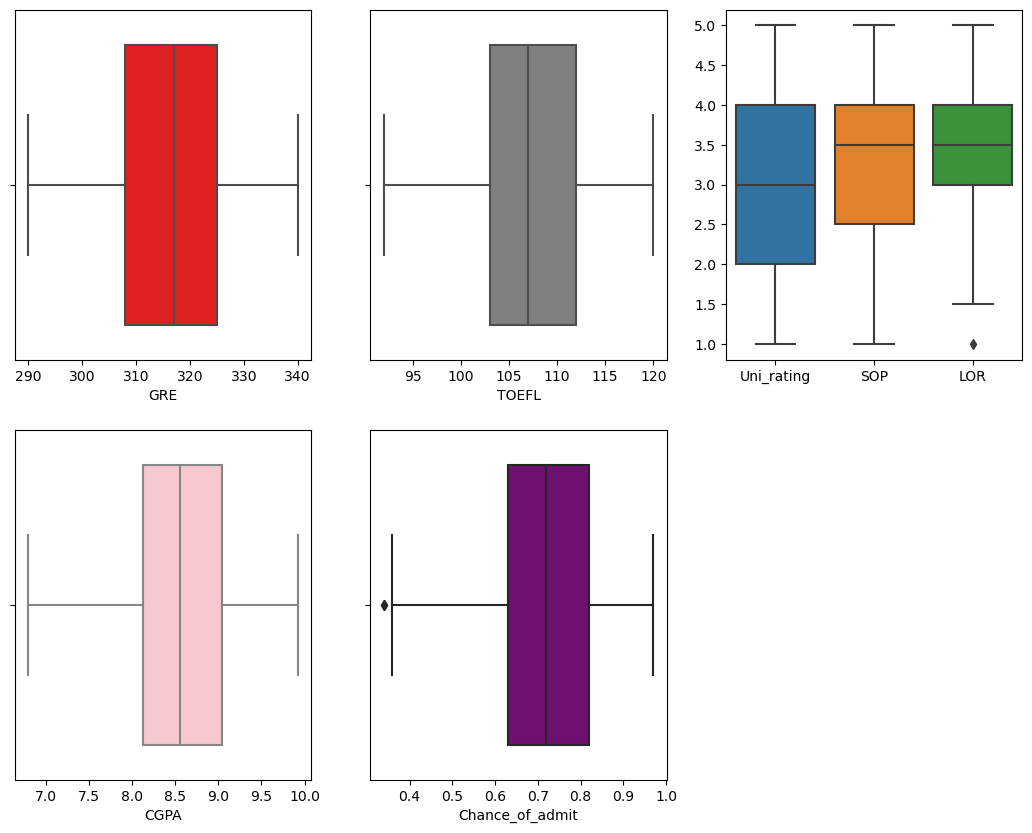

In [14]:
plt.figure(figsize=(13,10))

plt.subplot(2,3,1)
sns.boxplot(df['GRE'], color='red')

plt.subplot(2,3,2)
sns.boxplot(df['TOEFL'], color='gray')

plt.subplot(2,3,3)
sns.boxplot(data=df[['Uni_rating', 'SOP', 'LOR']])

plt.subplot(2,3,4)
sns.boxplot(df['CGPA'], color='pink')

plt.subplot(2,3,5)
sns.boxplot(df['Chance_of_admit'], color='purple')

plt.show()

* GRE column has highest value = 340 and lowest value = 290. Its median value lies around 317.
* TOEFL column has highest value = 120 and lowest value = 92. Its median value lies around 107. The data seems right skewed.
* Uni_rating column has highest value = 5 and lowest value = 1. Its median value is equal to 3. The data is symmetrical.
* SOP column has highest value = 5 and lowest value = 1. Its median value is equal to 3.5. The data is left skewed.
* LOR column has highest value = 5 and lowest value = 1. Its median value is equal to 3.5. The data is symmetrical. There is an outlier in the data.
* CGPA column has highest value = 6.8 and lowest value = 9.9. Its median value lies around 8.5. The data seems symmetrical.
* Chance_of_admit column has highest value = 0.97 and lowest value = 0.33. Its median value is around 7.2. The data seems symmetrical. There is an outlier in the data.

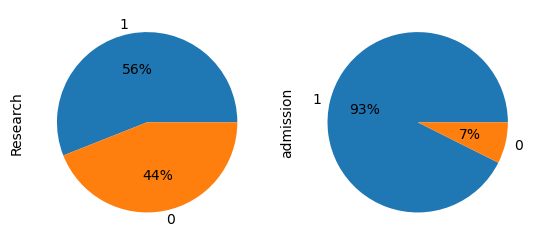

In [15]:
plt.subplot(1,2,1)
df['Research'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.subplot(1,2,2)
df['admission'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

* Nearly 56% students have research experience while 44% do not have research experience.
* Approximately 93% students have chances of admission. It shows that given data is unbalanced.

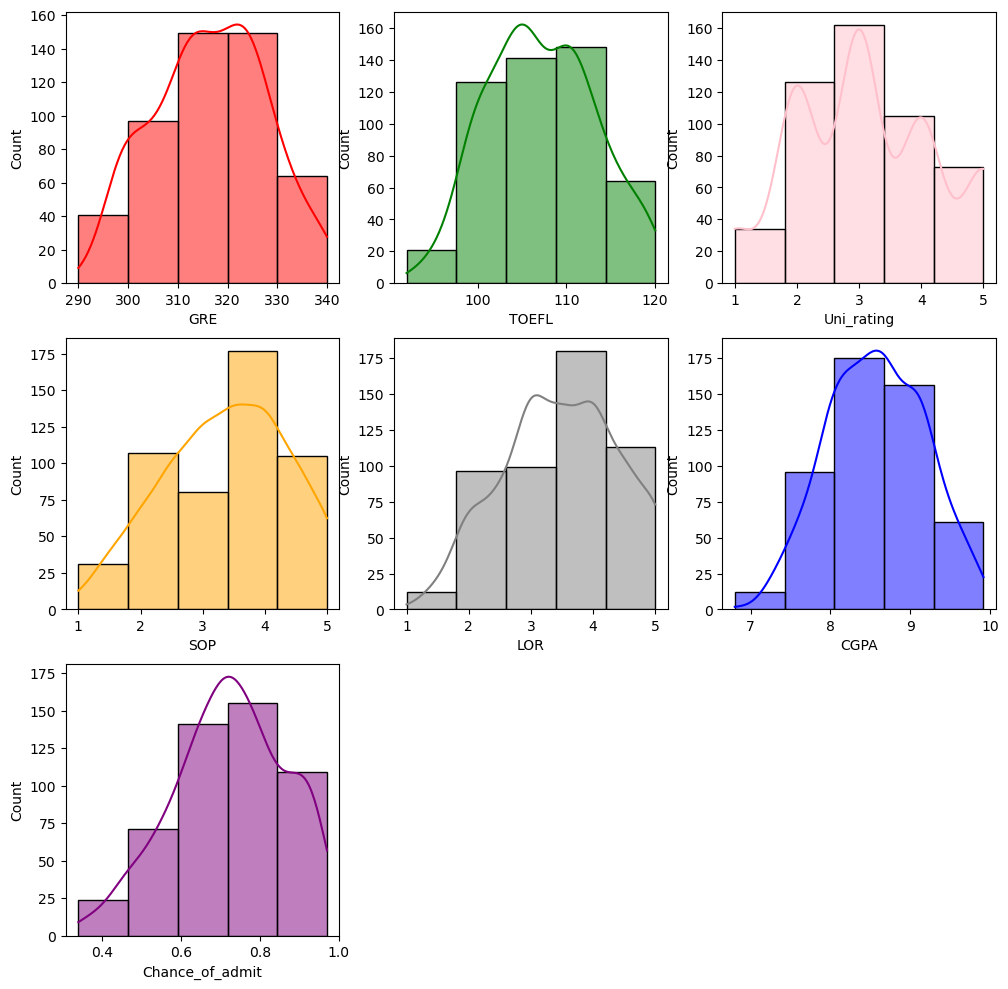

In [16]:
col_list = ['GRE', 'TOEFL', 'Uni_rating', 'SOP', 'LOR', 'CGPA', 'Chance_of_admit']
color_list = ['red', 'green', 'pink', 'orange', 'gray', 'blue', 'purple']
plt.figure(figsize=(12,12))
for i in range(7):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col_list[i]], bins=5, color=color_list[i], kde=True)
plt.show()

* Most students score between 310 to 330 in GRE.
* Most of the students score between 100 to 115 in TOEFL.
* Most of the students are applying to universities having University Rating = 3.
* SOP and LOR strength is highest at 4.
* Most of the students secure CGPA between 8 to 9.5.
* Chances of admission are high as most of the data has chance_of_admit > 0.5. 

<AxesSubplot:>

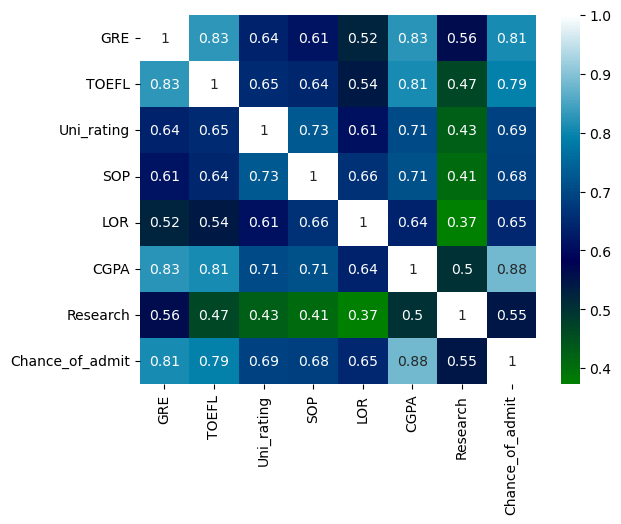

In [17]:
sns.heatmap(df.drop('admission',axis=1).corr(), annot=True, cmap='ocean')

Target variable "Chance_of_admit" has positively correlation with GRE, TOEFL and CGPA. It is weakly correlated to "Research Experience".

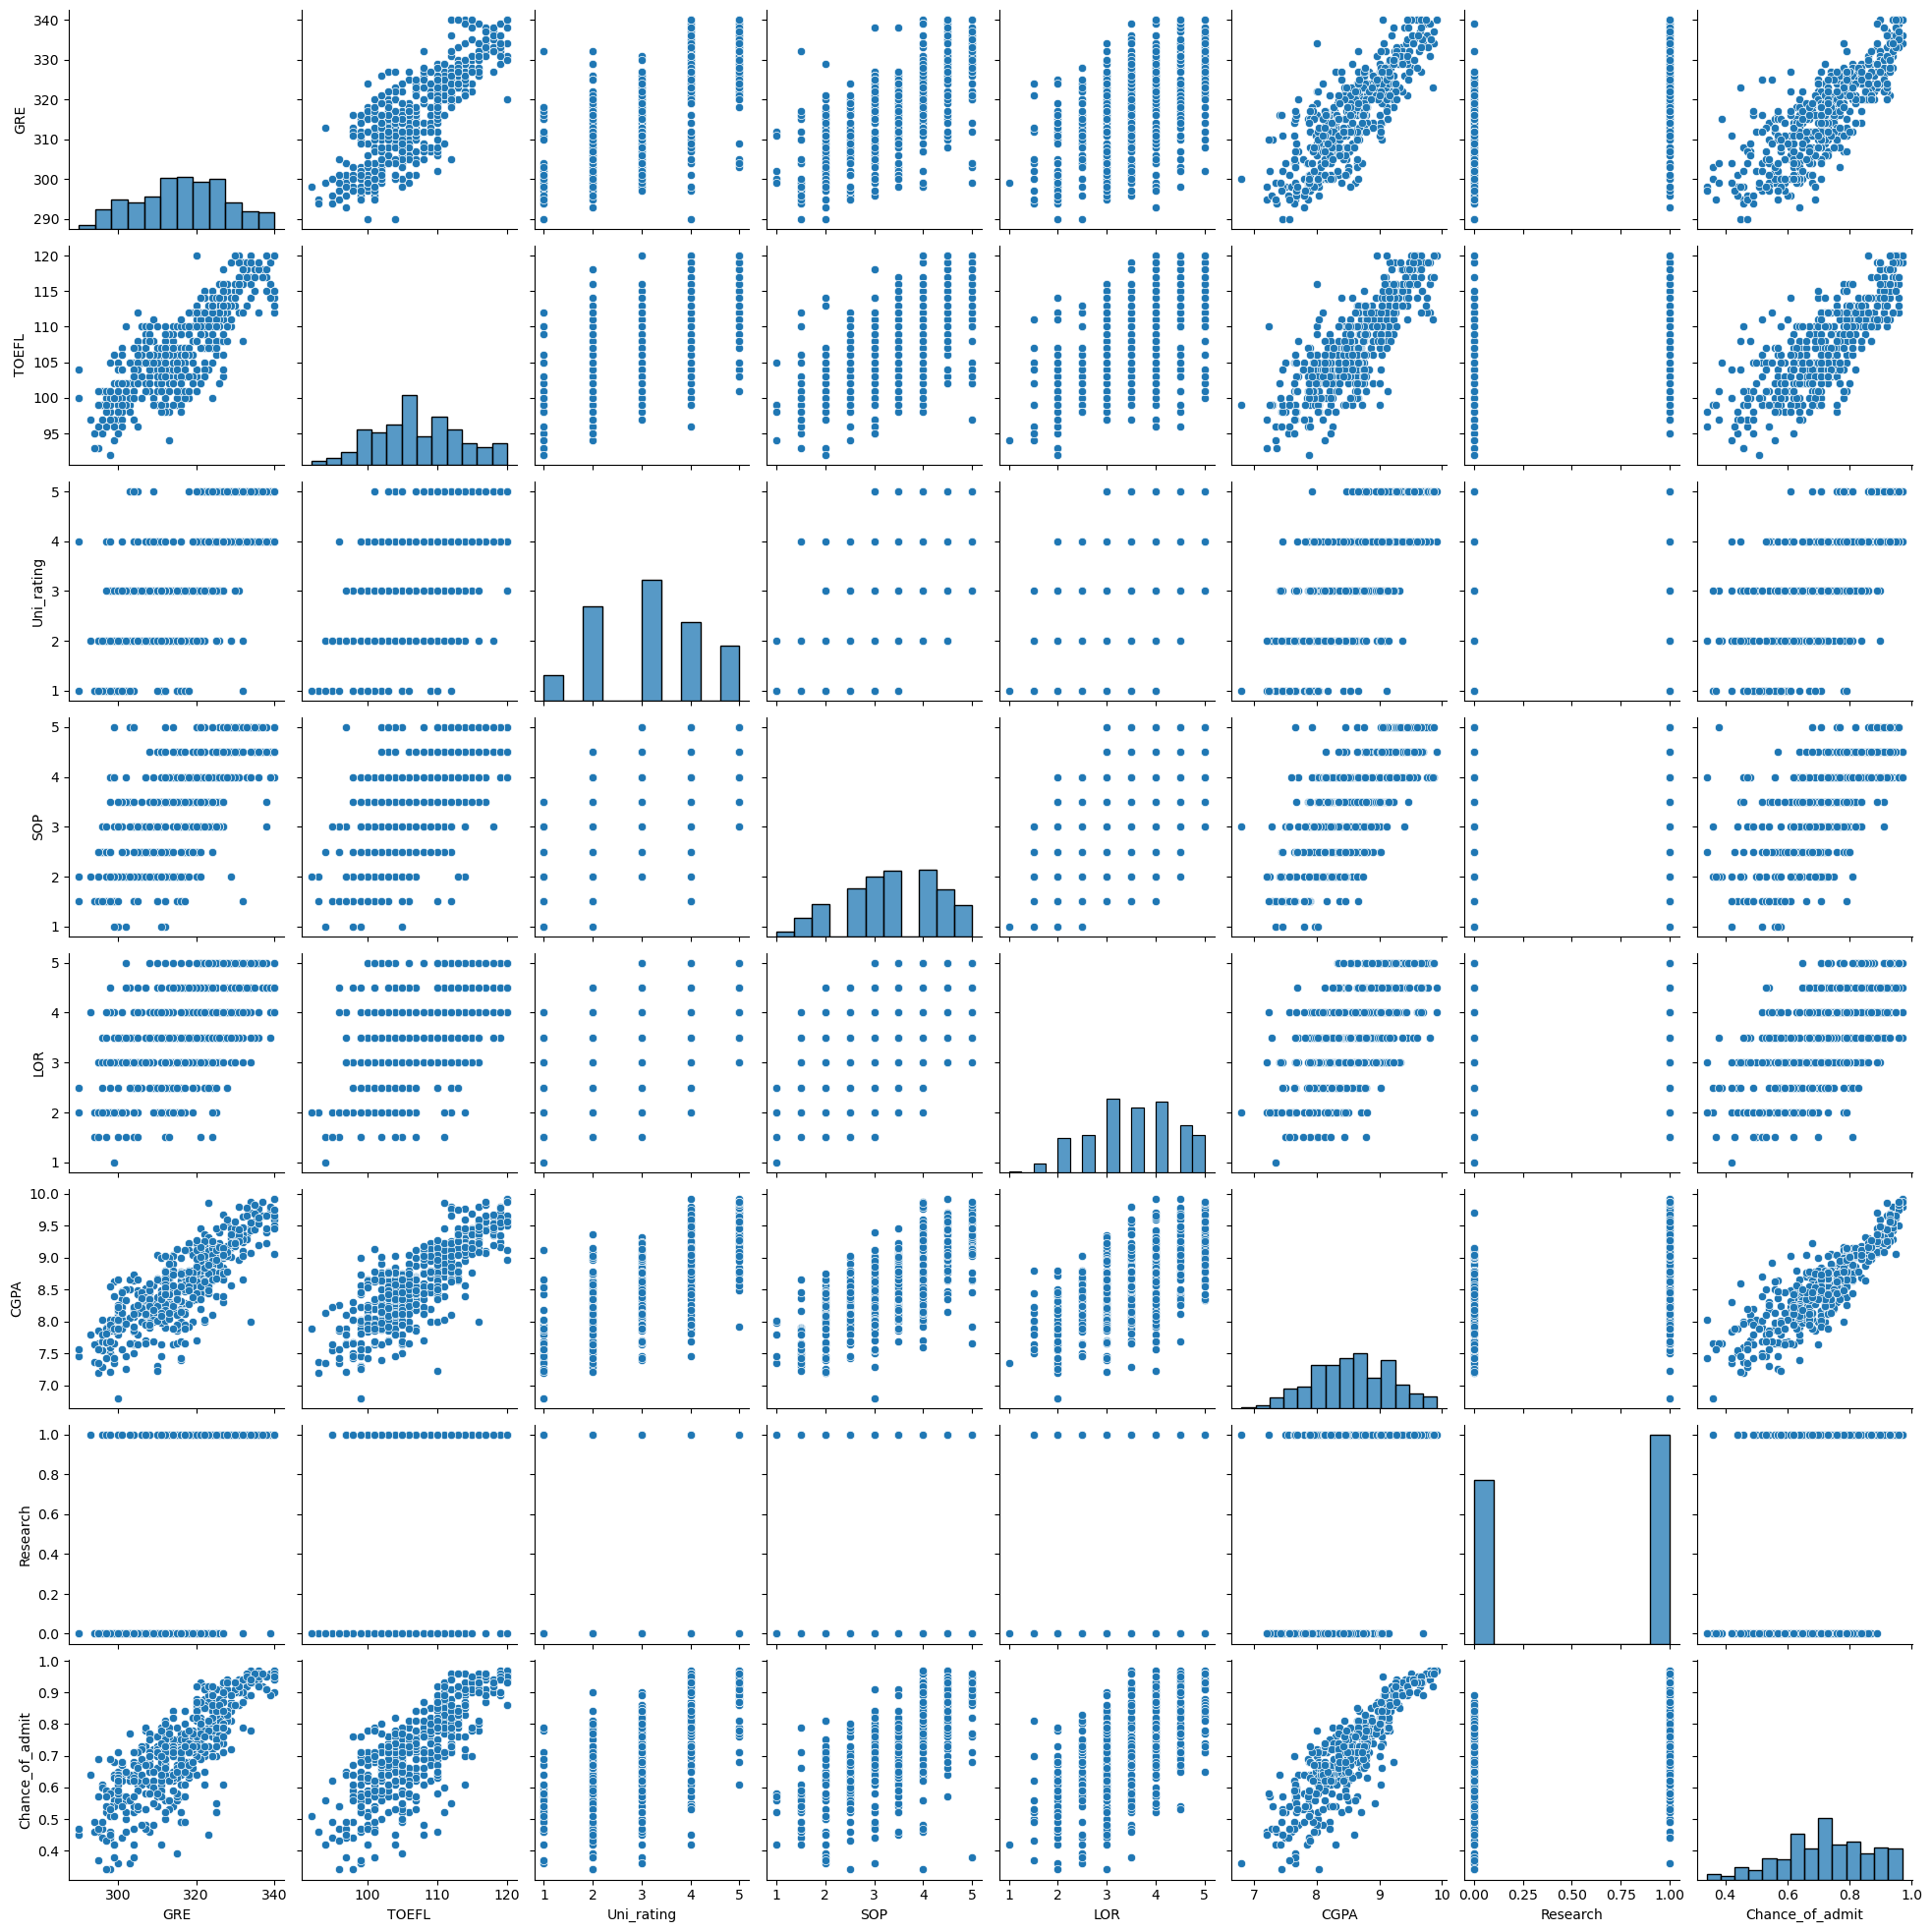

In [18]:
sns.pairplot(data = df.drop('admission', axis = 1))

This pairplot gives bivariate analysis. Each parameter is plotted against other parameters. The graphs along diagonal are histograms while all other graphs are scatterplots.

## Building a Model: Random Forest Classifier

* ### Step 1: Define x and y variable

In [19]:
x = df.iloc[:,:-2]
y = df['admission']

* ### Step 2: Split data into train and test data

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.35, random_state=21)

* ### Step 3: Hyperparameter tuning using GridSearchCV

In [21]:
# Defining parameters
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ["auto", "sqrt"]
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

param_grid = {"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf,
             "bootstrap":bootstrap}

# Selecting the model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

# Fitting data into GridSearchCV
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)
rf_Grid.fit(xtrain, ytrain)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [22]:
# Evaluating the model
print(rf_Grid.best_params_)
print(rf_Grid.best_score_)

{'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 25}
0.9477007588628382


In [23]:
# Fitting best parameters into RandomForestClassifier
rf_Model = RandomForestClassifier(bootstrap= True,
                                  max_depth= 2,
                                  max_features= 'auto',
                                  min_samples_leaf= 2,
                                  min_samples_split= 2,
                                  n_estimators= 25)
rf_Model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=25)

In [24]:
# Prediction
ypred_rf = rf_Model.predict(xtest)

* ### Step 4: Evaluating model using sklearn metrics

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy of the model is: ", accuracy_score(ytest, ypred_rf))
print('-----------------------------------------------------------')
print("Classification Report: \n", classification_report(ytest, ypred_rf))
print('-----------------------------------------------------------')
print("Confusion matrix: \n", confusion_matrix(ytest, ypred_rf))

Accuracy of the model is:  0.9371428571428572
-----------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.94      1.00      0.97       162

    accuracy                           0.94       175
   macro avg       0.97      0.58      0.62       175
weighted avg       0.94      0.94      0.92       175

-----------------------------------------------------------
Confusion matrix: 
 [[  2  11]
 [  0 162]]


<AxesSubplot:>

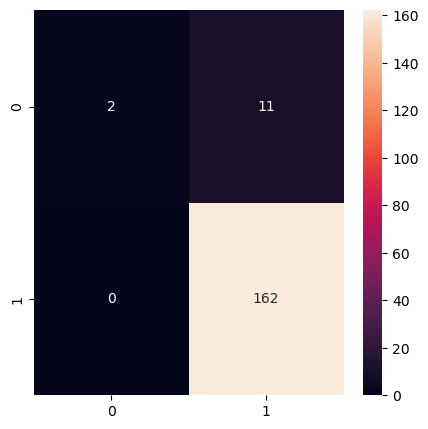

In [26]:
# Vizualizing confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(ytest, ypred_rf), annot = True, fmt='d')

## Conclusion
This model has 93% accuracy. It can be used to predict the chances of admission.